In [ ]:
https://www.geeksforgeeks.org/the-stock-span-problem/
https://practice.geeksforgeeks.org/problems/stock-span-problem-1587115621/1
https://www.educative.io/edpresso/the-stock-span-problem-in-cpp-and-python
http://www.algorithmsandme.com/stacks-stock-span-problem/
https://tutorialspoint.dev/data-structure/stack-data-structure/the-stock-span-problem
http://python.algorithmexamples.com/web/data_structures/stacks/stock_span_problem.html

# Problem Solving Template for the Stock Span Problem

_To learn how to use this template, check out the course ["Data Structures and Algorithms in Python"](https://jovian.ai/learn/data-structures-and-algorithms-in-python)._




## How to run the code and save your work

The recommended way to run this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. 

This tutorial is an executable [Jupyter notebook](https://jupyter.org). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

#### Saving your work

Before staring the assignment, let's save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later, and continue your work.

In [1]:
project_name = "Stock_span"
file = 'stock_span.ipynb'

In [121]:
!pip install jovian --upgrade --quiet

In [122]:
import jovian

In [9]:
jovian.commit(project=project_name, filename=file)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-problem-solving-template" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/python-problem-solving-template


'https://jovian.ai/aakashns/python-problem-solving-template'

## Problem Statement


> The stock span problem is a financial problem where we have a series of *n daily price quotes* for a stock and we need to calculate span of stock’s price for all n days. The span *Si* of the stock’s price on a given day i is defined as the maximum number of consecutive days just before the given day, for which the price of the stock on the current day is less than or equal to its price on the given day.

> For example, if an array of 7 days prices is given as {100, 80, 60, 70, 60, 75, 85}, then the span values for corresponding 7 days are {1, 1, 1, 2, 1, 4, 6}


Source: https://www.geeksforgeeks.org/

## The Method

Here's the systematic strategy we'll apply for solving problems:

1. State the problem clearly. Identify the input & output formats.
2. Come up with some example inputs & outputs. Try to cover all edge cases.
3. Come up with a correct solution for the problem. State it in plain English.
4. Implement the solution and test it using example inputs. Fix bugs, if any.
5. Analyze the algorithm's complexity and identify inefficiencies, if any.
6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

This approach is explained in detail in [Lesson 1](https://jovian.ai/learn/data-structures-and-algorithms-in-python/lesson/lesson-1-binary-search-linked-lists-and-complexity) of the course. Let's apply this approach step-by-step.

## Solution


### 1. State the problem clearly. Identify the input & output formats.

While this problem is stated clearly enough, it's always useful to try and express in your own words, in a way that makes it most clear for you. 


**Problem**

> The stock span problem is a financial problem where we have a series of *n daily price quotes* for a stock and we need to calculate span of stock’s price for all n days. The span *Si* of the stock’s price on a given day i is defined as the maximum number of consecutive days just before the given day, for which the price of the stock on the current day is less than or equal to its price on the given day.
<br/>


**Input**

1. GOOG = `[1348, 1428, 1413, 1482, 1634, 1469, 1621, 1760, 1751, 1835, 2036, 2043]`
2. MSFT = `[177, 181, 202, 203, 223, 209, 201, 213, 221, 231, 231, 230]`
3. AAPL = `[72, 78, 90, 105, 128, 115, 108, 118, 132, 131, 121, 119]`
4. TSLA = `[156, 167, 215, 286, 498, 429, 388, 567, 705, 793, 675, 654]`
5. AMZN = `[2474, 2442, 2758, 3164, 3450, 3148, 3036, 3168, 3256, 3206, 3092, 3074]`
6. NVDA = `[291, 354, 379, 424, 534, 540, 501, 535, 522, 519, 548, 513]`
7. INTC = `[58, 61, 58, 46, 49, 51, 43, 47, 49, 55, 60, 63]`
8. AMD = `[79, 84, 85, 91, 92, 75, 81, 90, 77, 52, 53, 52]` 

**Output**

1. GOOG = `[1, 2, 1, 4, 5, 1, 2, 8, 1, 10, 11, 12]`
2. MSFT = `[1, 2, 3, 4, 5, 1, 1, 3, 4, 10, 11, 1]`
3. AAPL = `[1, 2, 3, 4, 5, 1, 1, 3, 9, 1, 1, 1]`
4. TSLA = `[1, 2, 3, 4, 5, 1, 1, 8, 9, 10, 1, 1]`
5. AMZN = `[1, 1, 3, 4, 5, 1, 1, 3, 4, 1, 1, 1]`
6. NVDA = `[1, 2, 3, 4, 5, 6, 1, 2, 1, 1, 11, 1]`
7. INTC = `[1, 2, 1, 1, 2, 3, 1, 2, 3, 7, 9, 12]`
8. AMD = `[1, 2, 1, 4, 5, 1, 1, 8, 1, 1, 1, 1]` 


<br/>

Based on the above, we can now create a signature of our function:

In [3]:
GOOG = [2043,2036,1835,1751,1760,1621,1469,1634,1482,1413,1428,1348]
MSFT = [230,231,231,221,213,201,209,223,203,202,181,177]
AAPL = [119,121,131,132,118,108,115,128,105,90,78,72]
TSLA = [654,675,793,705,567,388,429,498,286,215,167,156]
AMZN = [3074,3092,3206,3256,3168,3036,3148,3450,3164,2758,2442,2474]
NVDA = [513,548,519,522,535,501,540,534,424,379,354,291]
INTC = [63,60,55,49,47,43,51,49,46,58,61,58]
AMD = [79,84,85,91,92,75,81,90,77,52,53,52]


In [4]:
# Reversing the list, because it was copy in descecing time order
GOOG = GOOG[::-1]
MSFT = MSFT[::-1]
AAPL = AAPL[::-1]
TSLA = TSLA[::-1]
AMZN = AMZN[::-1]
NVDA = NVDA[::-1]
INTC = INTC[::-1]
AMD = AMD[::-1]

# update lists
print('Updated List ascending order: \n','Google:',GOOG,'\n','Microsoft:',MSFT,'\n',
        'Apple:',AAPL,'\n','Tesla:',TSLA,'\n','Amazon:',AMZN,'\n',
        'Nvidia:',NVDA,'\n','Intel:',INTC,'\n','AMD:',AMD )

Updated List ascending order: 
 Google: [1348, 1428, 1413, 1482, 1634, 1469, 1621, 1760, 1751, 1835, 2036, 2043] 
 Microsoft: [177, 181, 202, 203, 223, 209, 201, 213, 221, 231, 231, 230] 
 Apple: [72, 78, 90, 105, 128, 115, 108, 118, 132, 131, 121, 119] 
 Tesla: [156, 167, 215, 286, 498, 429, 388, 567, 705, 793, 675, 654] 
 Amazon: [2474, 2442, 2758, 3164, 3450, 3148, 3036, 3168, 3256, 3206, 3092, 3074] 
 Nvidia: [291, 354, 379, 424, 534, 540, 501, 535, 522, 519, 548, 513] 
 Intel: [58, 61, 58, 46, 49, 51, 43, 47, 49, 55, 60, 63] 
 AMD: [52, 53, 52, 77, 90, 81, 75, 92, 91, 85, 84, 79]


Text(0.5, 1.0, 'AMD prices')

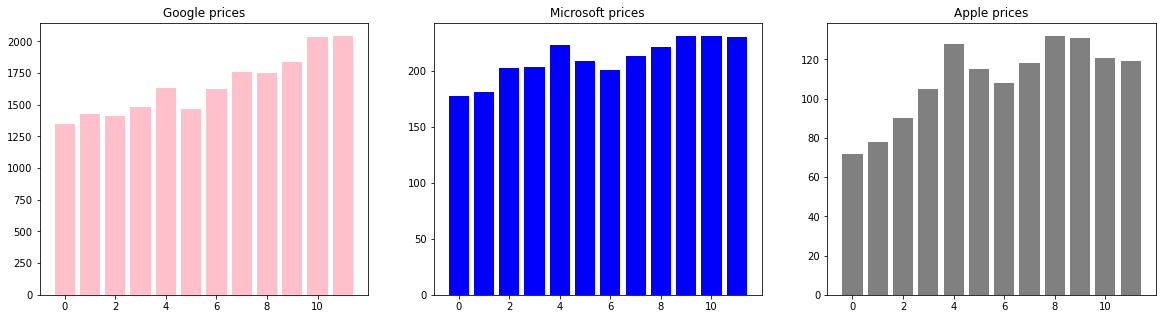

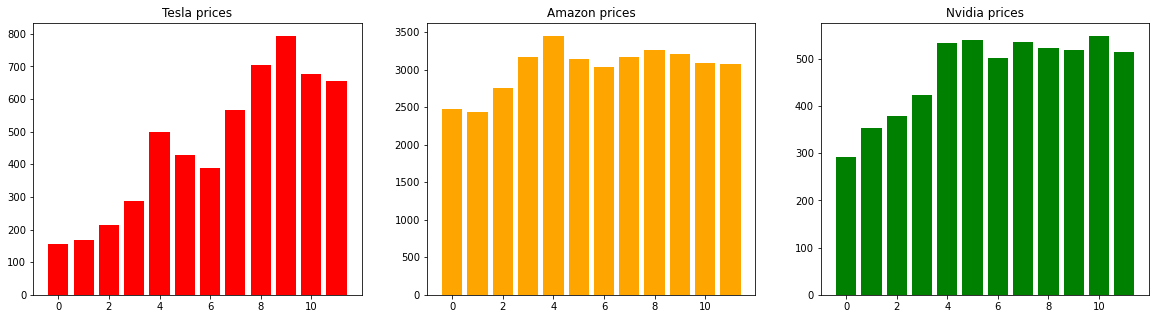

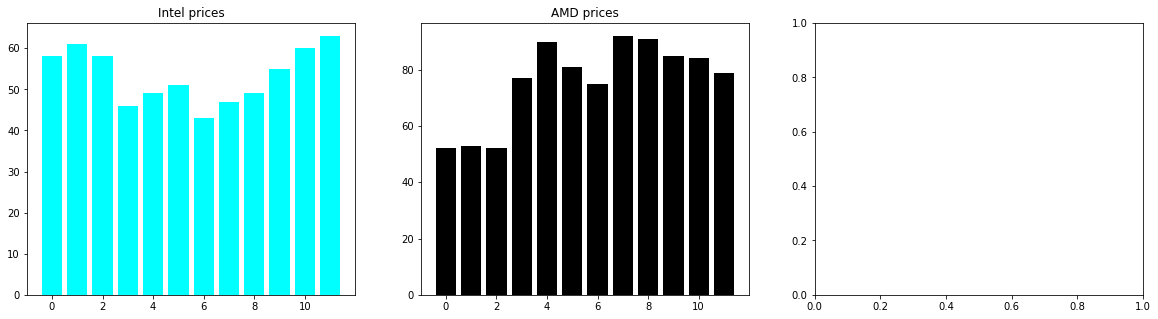

In [5]:
import matplotlib.pyplot as plt
import numpy as np

f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 5))
index = np.arange(len(GOOG))
ax1.bar(np.arange(len(GOOG)),GOOG, color='pink')
ax1.set_title('Google prices')
ax2.bar(np.arange(len(MSFT)),MSFT, color='blue')
ax2.set_title('Microsoft prices')
ax3.bar(np.arange(len(AAPL)),AAPL,color='gray')
ax3.set_title('Apple prices')
f, (ax4,ax5,ax6) = plt.subplots(1, 3, figsize=(20, 5))
ax4.bar(np.arange(len(TSLA)),TSLA, color='red')
ax4.set_title('Tesla prices')
ax5.bar(np.arange(len(AMZN)),AMZN,color='orange')
ax5.set_title('Amazon prices')
ax6.bar(np.arange(len(NVDA)),NVDA,color='green')
ax6.set_title('Nvidia prices')
f, (ax7,ax8,ax9) = plt.subplots(1, 3, figsize=(20, 5))
ax7.bar(np.arange(len(INTC)),INTC, color='cyan')
ax7.set_title('Intel prices')
ax8.bar(np.arange(len(AMD)),AMD,color='black')
ax8.set_title('AMD prices')


In [7]:
# Create a function signature here. The body of the function can contain a single statement: pass
def span_brute(price): 
    pass      


In [107]:
def span_brute(price): 
    # Span value of first day is always 1 
    n = len(price)
    S = [None] * n
    S[0] = 1
    # it has 3 arguments:
    # price: the list of stock prices,
    # n: the lenght of the list pf prices and,
    # S: is the output and empty list of the stock prices with same size
    # Calculate span value of remaining days by linearly  
    # checking previous days 
    for i in range(0, len(price)): 
        S[i] = 1   # Initialize span value 
        # Traverse left while the next element on left is 
        # smaller than price[i] 
        j = i - 1
        while (j >= 0) and (price[i] >= price[j]):
            S[i] += 1
            j -= 1
    return S         

In [133]:
def span(rates):
    
    stockspan = []
    stack = [] # Creating an empty stack

    # Base case
    stockspan.append(1)
    stack.append(0)
    for i in range(1, len(rates)):

      # Pop elements out of stack until either: 1) The stack gets empty
      #or 2) the rate at stack top turns out to be larger than the rate
      #at the current element
      while rates[i] > rates[stack[-1]]:
        stack.pop()

        if len(stack) == 0:
          break
      
      # Set the stockspan values.
      if len(stack) > 0:
          stockspan.append(i - stack[-1])
      else:
          stockspan.append(i + 1) 

      stack.append(i)
    
    return stockspan

In [134]:
span(GOOG)



[1, 2, 1, 4, 5, 1, 2, 8, 1, 10, 11, 12]

Save and upload your work before continuing.

In [123]:
import jovian

In [16]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-problem-solving-template" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/python-problem-solving-template


'https://jovian.ai/aakashns/python-problem-solving-template'

### 2. Come up with some example inputs & outputs. Try to cover all edge cases.

Our function should be able to handle any set of valid inputs we pass into it. Here's a list of some possible variations we might encounter:

1. **???**
2. **???**
3. **???**
4. **???**
5. **???**

(add more if required)


We'll express our test cases as dictionaries, to test them easily. Each dictionary will contain 2 keys: `input` (a dictionary itself containing one key for each argument to the function and `output` (the expected result from the function). 

In [ ]:
Google: [1348, 1428, 1413, 1482, 1634, 1469, 1621, 1760, 1751, 1835, 2036, 2043] 
Microsoft: [177, 181, 202, 203, 223, 209, 201, 213, 221, 231, 231, 230] 
Apple: [72, 78, 90, 105, 128, 115, 108, 118, 132, 131, 121, 119] 
Tesla: [156, 167, 215, 286, 498, 429, 388, 567, 705, 793, 675, 654] 
Amazon: [2474, 2442, 2758, 3164, 3450, 3148, 3036, 3168, 3256, 3206, 3092, 3074] 
Nvidia: [291, 354, 379, 424, 534, 540, 501, 535, 522, 519, 548, 513] 
Intel: [58, 61, 58, 46, 49, 51, 43, 47, 49, 55, 60, 63] 
AMD: [52, 53, 52, 77, 90, 81, 75, 92, 91, 85, 84, 79]

In [124]:
test = {
    'input': [10, 4, 5, 90, 120, 80, 100, 80, 60, 70, 60, 75, 85],
    'output': [1, 1, 2, 4, 5, 1, 2, 1, 1, 2, 1, 4, 6]
    }

In [125]:
span_brute(test['input'])

[1, 1, 2, 4, 5, 1, 2, 1, 1, 2, 1, 4, 6]

We can test the function by passing the input to it directly or by using the `evaluate_test_case` function from `jovian`.

In [127]:
from jovian.pythondsa import evaluate_test_case

In [137]:
evaluate_test_case(span, test['input'])

TypeError: list indices must be integers or slices, not str

Create one test case for each of the scenarios listed above. We'll store our test cases in an array called `tests`.

In [ ]:
tests = []

In [ ]:
tests.append(test)

In [ ]:
tests.append({
    'input': {
        ???
    },
    'output': ???
})

In [ ]:
# add more test cases

Evaluate your function against all the test cases together using the `evaluate_test_cases` (plural) function from `jovian`.

In [14]:
from jovian.pythondsa import evaluate_test_cases

In [ ]:
evaluate_test_cases(???)

Verify that all the test cases were evaluated. We expect them all to fail, since we haven't implemented the function yet.

Let's save our work before continuing.

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-problem-solving-template" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/python-problem-solving-template


'https://jovian.ai/aakashns/python-problem-solving-template'

### 3. Come up with a correct solution for the problem. State it in plain English.

Our first goal should always be to come up with a _correct_ solution to the problem, which may not necessarily be the most _efficient_ solution. Come with a correct solution and explain it in simple words below:

1. **???**
2. **???**
3. **???**
4. **???**
5. **???**

(add more steps if required)


Let's save and upload our work before continuing.




In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-problem-solving-template" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/python-problem-solving-template


'https://jovian.ai/aakashns/python-problem-solving-template'

###  4. Implement the solution and test it using example inputs. Fix bugs, if any.

### 5. Analyze the algorithm's complexity and identify inefficiencies, if any.

In [21]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-problem-solving-template" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/python-problem-solving-template


'https://jovian.ai/aakashns/python-problem-solving-template'

### 6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-problem-solving-template" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/python-problem-solving-template


'https://jovian.ai/aakashns/python-problem-solving-template'

### 7. Come up with a correct solution for the problem. State it in plain English.

Come with the optimized correct solution and explain it in simple words below:

1. **???**
2. **???**
3. **???**
4. **???**
5. **???**

(add more steps if required)


Let's save and upload our work before continuing.



In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-problem-solving-template" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/python-problem-solving-template


'https://jovian.ai/aakashns/python-problem-solving-template'

### 8. Implement the solution and test it using example inputs. Fix bugs, if any.

### 9. Analyze the algorithm's complexity and identify inefficiencies, if any.

If you found the problem on an external platform, you can make a submission to test your solution.

Share your approach and start a discussion on the Jovian forum: https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/78

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
